# Data Prep

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#pandas profiling for EDA
from pandas_profiling import ProfileReport
import gc

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor


In [2]:
# Read in train data
app_train = pd.read_csv('C:/Users/User/Desktop/home-credit-default-risk/application_train.csv')
# Read in test data 
app_test = pd.read_csv('C:/Users/User/Desktop/home-credit-default-risk/application_test.csv')

# EDA

In [3]:
#Data frame at a glance
app_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#profile report
trainprofile = ProfileReport(app_train, minimal=True)
trainprofile.to_widgets()

In [5]:
#how many unique classes do we have for categotical features
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [6]:
#list coloumns with most missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(app_train)
missing_values.head(30)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Visualizing Missing Data

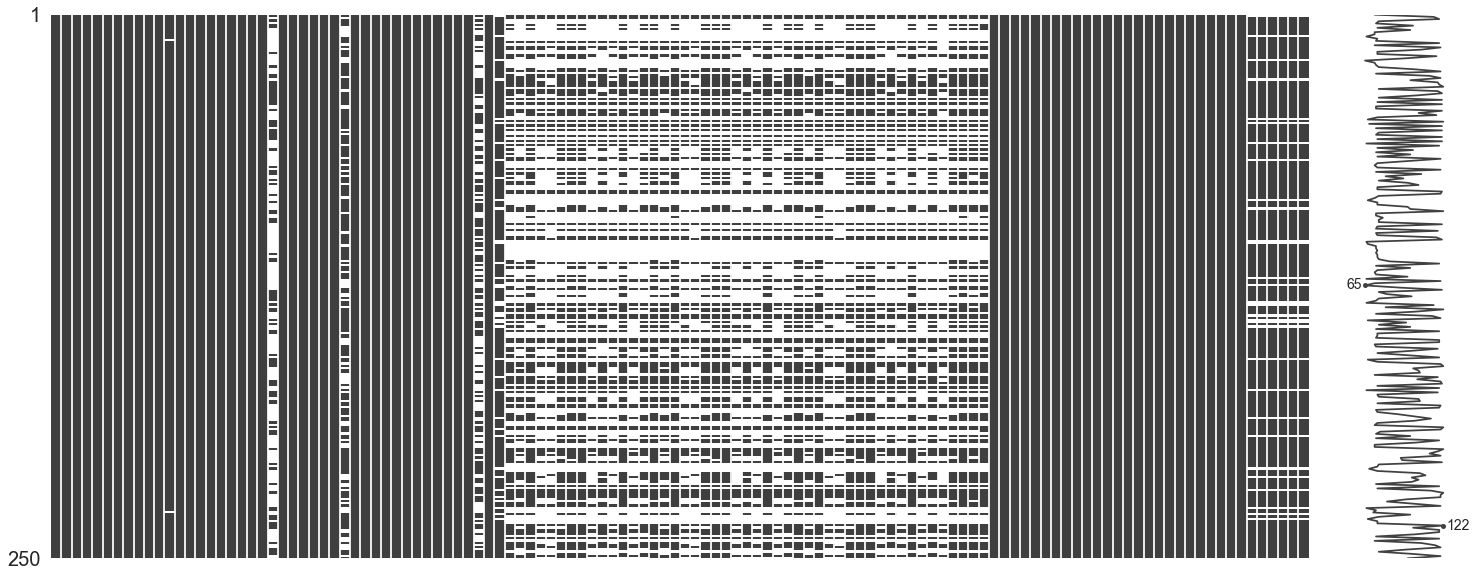

In [7]:
 import missingno as msno
%matplotlib inline
msno.matrix(app_train.sample(250))

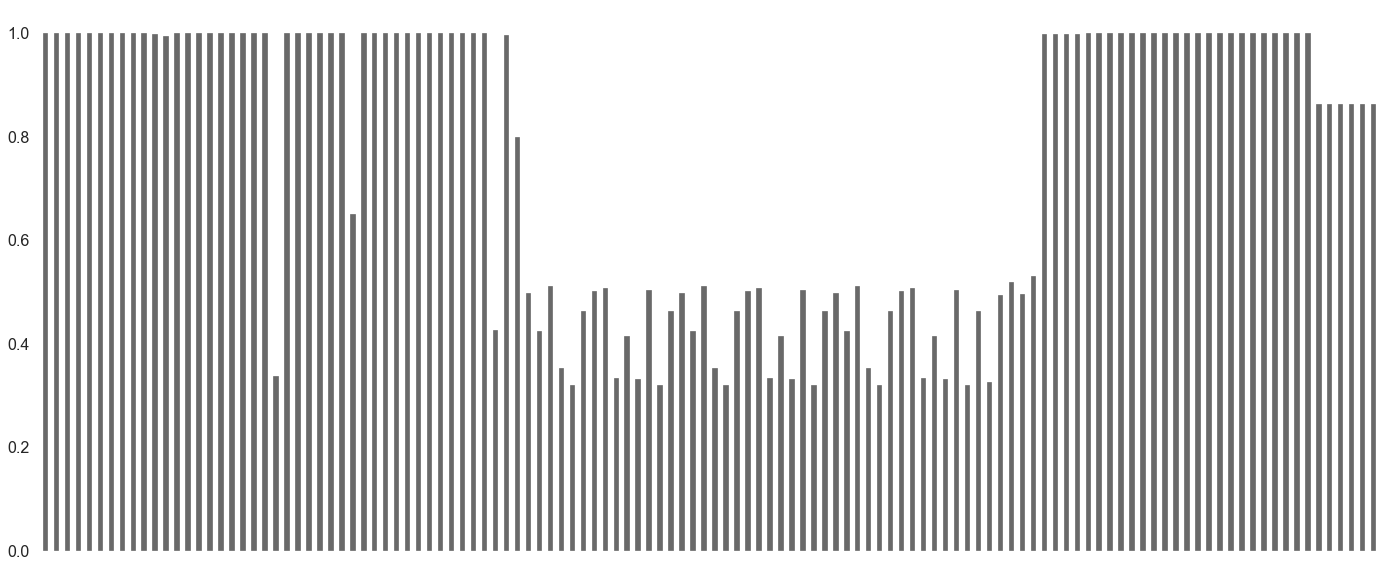

In [8]:
 msno.bar(app_train.sample(1000))

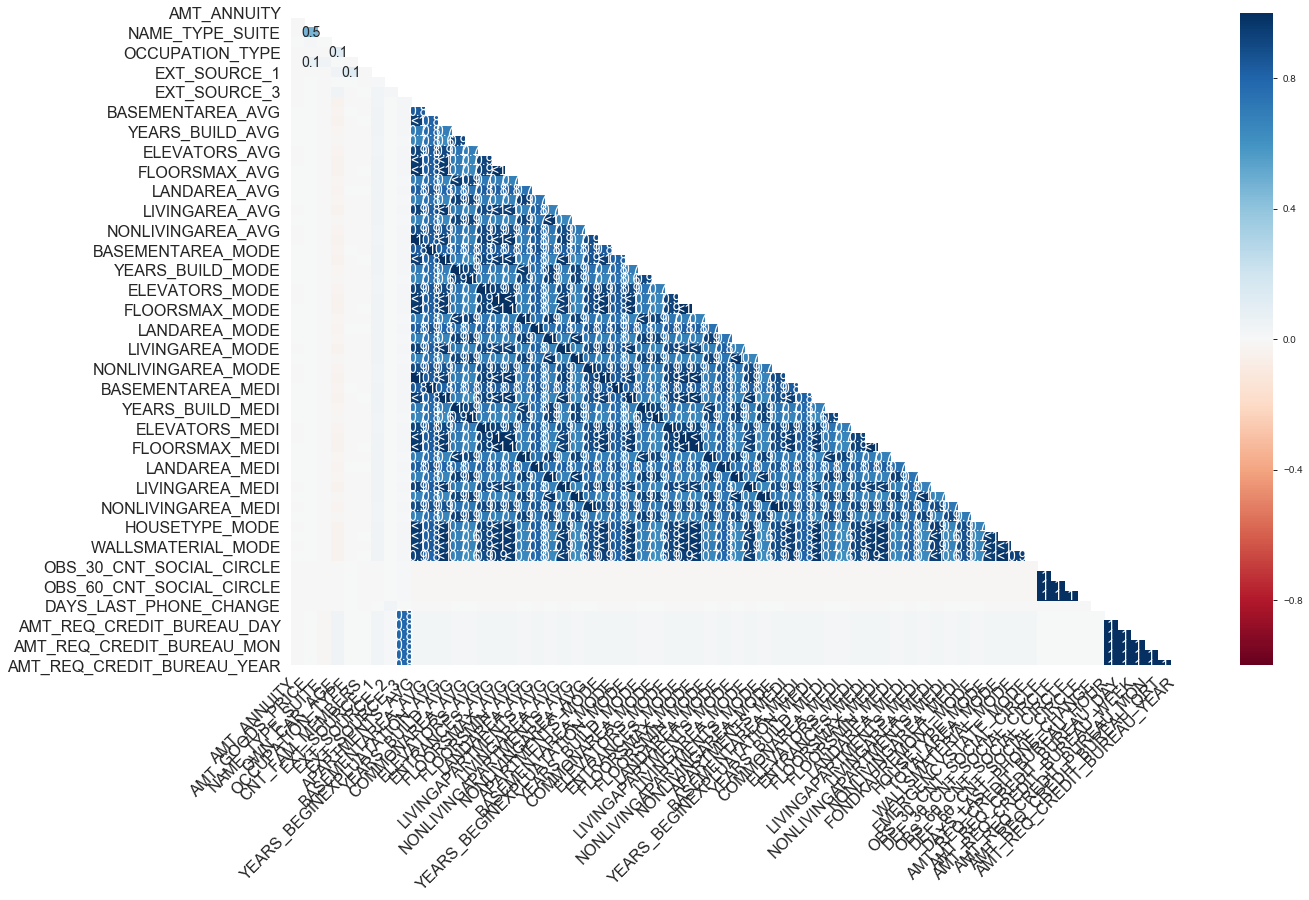

In [9]:
#heatmap
msno.heatmap(app_train)

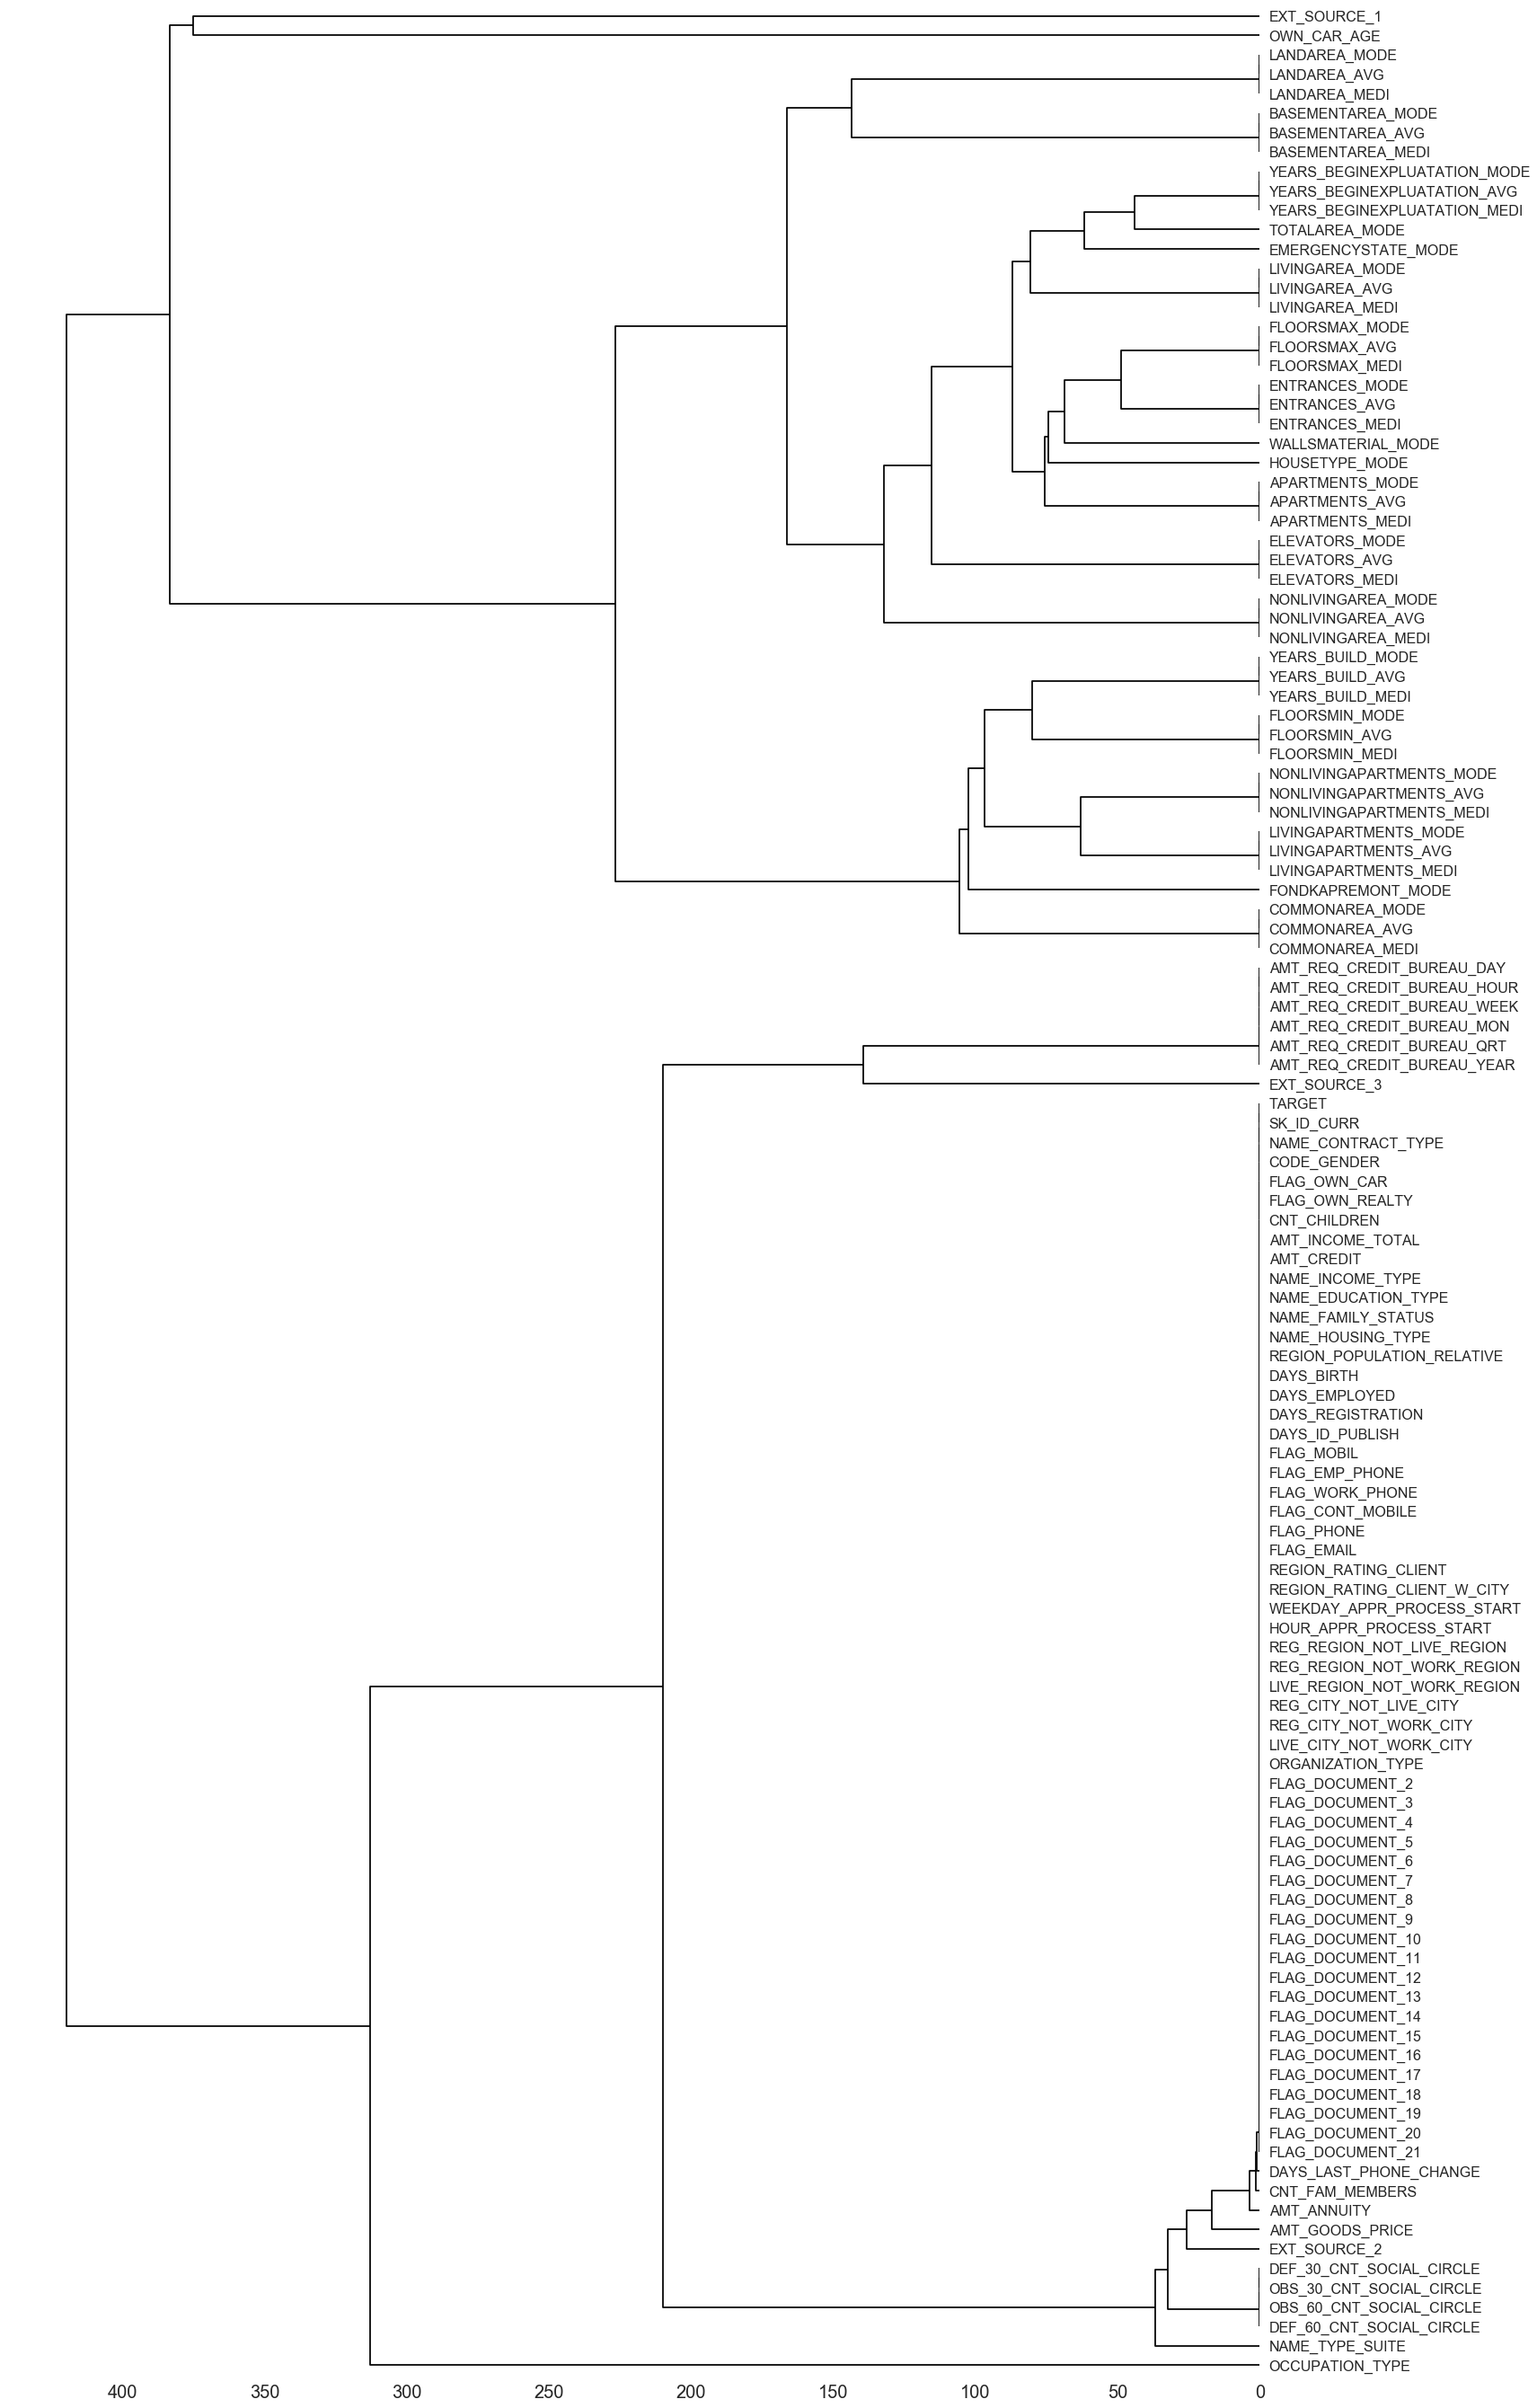

In [10]:
#Dendogram
msno.dendrogram(app_train)

In [11]:
# Fixing incorrect data in Days Employed

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 240)


In [14]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


In [15]:

# Imputing the data by using the median of each feature to replace relative data
app_train[app_train.columns.tolist()] = SimpleImputer(strategy='median').fit_transform(app_train[app_train.columns.tolist()])
app_test[app_test.columns.tolist()] = SimpleImputer(strategy='median').fit_transform(app_test[app_test.columns.tolist()])


In [16]:
app_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 240 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(240)
memory usage: 89.3 MB


# Feature Selection

In [17]:
#stratified sampling 
application_sample1 = app_train.loc[app_train.TARGET==1].sample(frac=0.1, replace=False)
print('label 1 sample size:', str(application_sample1.shape[0]))
application_sample0 = app_train.loc[app_train.TARGET==0].sample(frac=0.1, replace=False)
print('label 0 sample size:', str(application_sample0.shape[0]))
application = pd.concat([application_sample1, application_sample0], axis=0).sort_values('SK_ID_CURR')

label 1 sample size: 2482
label 0 sample size: 28269


In [18]:
application.shape

(30751, 241)

In [19]:
X = application.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application.TARGET
feature_name = X.columns.tolist()

## Filter

### Pearson Correlation

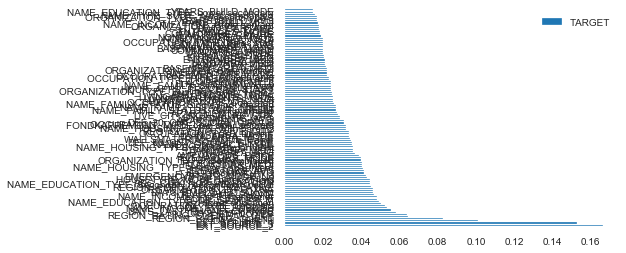

In [20]:
def pcorr(data):
    corrdf = pd.DataFrame(data[data.columns[1:]].corr()['TARGET'][:])
    corrdf = corrdf.drop('TARGET')
    corrdf['TARGET'] = np.abs(corrdf['TARGET'])
    corrdf_graph = corrdf.sort_values('TARGET', ascending = False)
    return corrdf_graph[:100].plot.barh()
pcorr(application)

In [21]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-75:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y)

In [22]:
cor_list = []
for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

In [23]:
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-75:]].columns.tolist()


## Wrapper

### Recursive Feature Elimination 

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X_norm = MinMaxScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=75, step=5, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 239 features.
Fitting estimator with 234 features.
Fitting estimator with 229 features.
Fitting estimator with 224 features.
Fitting estimator with 219 features.
Fitting estimator with 214 features.
Fitting estimator with 209 features.
Fitting estimator with 204 features.
Fitting estimator with 199 features.
Fitting estimator with 194 features.
Fitting estimator with 189 features.
Fitting estimator with 184 features.
Fitting estimator with 179 features.
Fitting estimator with 174 features.
Fitting estimator with 169 features.
Fitting estimator with 164 features.
Fitting estimator with 159 features.
Fitting estimator with 154 features.
Fitting estimator with 149 features.
Fitting estimator with 144 features.
Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
F

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=75, step=5, verbose=5)

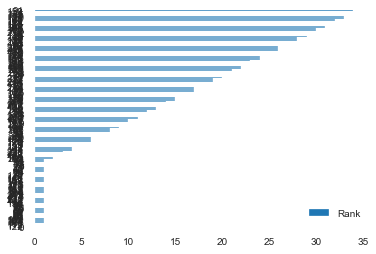

In [25]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
ranking = rfe_selector.ranking_

rfe_lists = {'Feature Name': feature_name, 'Rank':ranking}
rfe_total = pd.DataFrame(rfe_lists)
rfe_graph = rfe_total.sort_values('Rank', ascending = True)
rfe_graph.plot.barh()


## Embedded

### Random Forrest


In [26]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=75), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

101 selected features


In [27]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'RFE':rfe_support, 
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(75)

,Feature,Pearson,RFE,Random Forest,Total
1,TOTALAREA_MODE,True,True,True,3
2,REGION_RATING_CLIENT,True,True,True,3
3,OCCUPATION_TYPE_Core staff,True,True,True,3
4,LIVINGAREA_MEDI,True,True,True,3
5,LIVINGAREA_AVG,True,True,True,3
6,LIVINGAPARTMENTS_MODE,True,True,True,3
7,FLOORSMAX_AVG,True,True,True,3
8,EXT_SOURCE_3,True,True,True,3
9,EXT_SOURCE_2,True,True,True,3
10,EXT_SOURCE_1,True,True,True,3


In [28]:
feature_names = feature_selection_df['Feature'].head(75)
feature_name_list = []
for i in range(1,76):
    cor = feature_names[i]
    feature_name_list.append(cor)
feature_name_list


['TOTALAREA_MODE',
 'REGION_RATING_CLIENT',
 'OCCUPATION_TYPE_Core staff',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_EMPLOYED',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'YEARS_BUILD_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_POPULATION_RELATIVE',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Construction',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Accountants',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUS

In [29]:
app_train_feature = app_train[feature_name_list]
app_train_feature["TARGET"]=app_train["TARGET"]


In [30]:
app_train_feature.head(5)

,TOTALAREA_MODE,REGION_RATING_CLIENT,OCCUPATION_TYPE_Core staff,LIVINGAREA_MEDI,LIVINGAREA_AVG,LIVINGAPARTMENTS_MODE,FLOORSMAX_AVG,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,...,CODE_GENDER_F,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_ANNUITY,YEARS_BUILD_MODE,YEARS_BUILD_AVG,TARGET
0,0.0149,2.0,0.0,0.0193,0.0190,0.0220,0.0833,0.139376,0.262949,0.083037,...,0.0,0.0369,0.0369,1.0,0.0,0.0,24700.5,0.6341,0.6192,1.0
1,0.0714,1.0,1.0,0.0558,0.0549,0.0790,0.2917,0.535276,0.622246,0.311267,...,1.0,0.0529,0.0529,0.0,0.0,0.0,35698.5,0.8040,0.7960,0.0
2,0.0688,2.0,0.0,0.0749,0.0745,0.0771,0.1667,0.729567,0.555912,0.505998,...,0.0,0.0758,0.0763,0.0,0.0,0.0,6750.0,0.7648,0.7552,0.0
3,0.0688,2.0,0.0,0.0749,0.0745,0.0771,0.1667,0.535276,0.650442,0.505998,...,1.0,0.0758,0.0763,1.0,0.0,0.0,29686.5,0.7648,0.7552,0.0
4,0.0688,2.0,1.0,0.0749,0.0745,0.0771,0.1667,0.535276,0.322738,0.505998,...,0.0,0.0758,0.0763,0.0,0.0,0.0,21865.5,0.7648,0.7552,0.0


## Model 

### Balancing the data using SMOTE

In [31]:
X = app_train_feature.drop(['TARGET'], axis=1)
y = app_train_feature.TARGET
feature_name = X.columns.tolist()

In [32]:
pip install imbalanced-learn --user


Note: you may need to restart the kernel to use updated packages.


In [33]:
import imblearn

import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
import collections
from collections import Counter
from numpy import where
from matplotlib import pyplot

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [34]:
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})


In [35]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [36]:
X, y = pipeline.fit_resample(X, y)


In [37]:
counter = Counter(y)
print(counter)


Counter({0.0: 56536, 1.0: 28268})


### Logistic Regression

In [38]:
app_train_feature = X
app_train_feature['TARGET'] = y
app_train_feature.shape

(84804, 76)

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(app_train_feature, test_size=0.2)
print(train.shape)
print(test.shape)

(67843, 76)
(16961, 76)


In [40]:
train_label = train['TARGET']
train = train.drop(['TARGET'], axis=1)
#test_label = test['TARGET']
#test = test.drop(['TARGET'], axis=1)
print(train.shape)
print(train_label.shape)

(67843, 75)
(67843,)


In [41]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_label)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
test_label = test['TARGET']
test = test.drop(['TARGET'], axis=1)
print(test.shape)
print(test_label.shape)

(16961, 75)
(16961,)


In [43]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [44]:
log_reg_pred.shape

(16961,)

In [45]:
print("AUC Score:", roc_auc_score(test_label, log_reg_pred))

AUC Score: 0.6345608523352895
